# <center> ***MACHINE LEARNING BASED LUEKAEMIA CANCER PREDICTION SYSTEM USING PROTEIN SEQUENTIAL DATA*** </center>


## ***Note:***
#### *The features are extracted from Di-peptide Compissiton Technique*

# ***Table of Content***
1. Importing Libraries.

2. Collecting information about dataset.
3. Spltting dataset into X and Y.
4. Checking Co-realtion.
5. Outliers Identification
6. Outlier Removal.
7. Null Value Checking.
8. Dropping some Features.
9. Filling NaN values
10. Data Augmentation:

    - Meringing X and Y dataset

    - Then split into Positive and Negative Dataframes
    - Perfroming Augmentation on Positive Dataset only
    - Perfroming Augmentation on Negative Dataset only
    - Merge the Postive and Negative & split into X and Y
    

11. Passing data through Machine Learning Algorithms

    - SVM = 90% ~ 93%
    
    - Random Forest = 90% ~ 92%
    - K Neighbour Classifier = 83% ~ 84%
    - XG-Boost = 84% ~ 85%
    - Decision Tree = 81% ~ 84%
    - Logistic Regression = 66% ~ 67%
    - ROC Curve for all the above algorithms

### ***Importing Libraries***

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

### ***Reading Dataset csv file***

In [2]:
df=pd.read_csv('CML_PAAC_Combined_1.csv')
df.head(3)

,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_17,Var1_18,Var1_19,Var1_20,Var1_21,Var1_22,Var1_23,Var1_24,Var1_25,Label
0,6,6,10,7,5,14,11,12,0,13,...,9,4,6,15,0,0,0,0,0,1
1,21,14,12,10,1,21,10,18,4,6,...,11,7,6,18,0,0,0,0,0,1
2,17,20,6,9,4,11,12,12,5,6,...,6,2,6,5,0,0,0,0,0,1


### ***Checking Shape of Dataset***

In [3]:
df.shape

(3382, 26)

### ***Getting some information***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Var1_1   3382 non-null   int64
 1   Var1_2   3382 non-null   int64
 2   Var1_3   3382 non-null   int64
 3   Var1_4   3382 non-null   int64
 4   Var1_5   3382 non-null   int64
 5   Var1_6   3382 non-null   int64
 6   Var1_7   3382 non-null   int64
 7   Var1_8   3382 non-null   int64
 8   Var1_9   3382 non-null   int64
 9   Var1_10  3382 non-null   int64
 10  Var1_11  3382 non-null   int64
 11  Var1_12  3382 non-null   int64
 12  Var1_13  3382 non-null   int64
 13  Var1_14  3382 non-null   int64
 14  Var1_15  3382 non-null   int64
 15  Var1_16  3382 non-null   int64
 16  Var1_17  3382 non-null   int64
 17  Var1_18  3382 non-null   int64
 18  Var1_19  3382 non-null   int64
 19  Var1_20  3382 non-null   int64
 20  Var1_21  3382 non-null   int64
 21  Var1_22  3382 non-null   int64
 22  Var1_23  3382 non-null  

### ***Splitting into Input & Output***

In [5]:
X_input = df.iloc[:,0:25] 
Y_output = df.iloc[:,-1]
print(f'Shape of X_input:{X_input.shape}\nShape of Y_output:{Y_output.shape}')

Shape of X_input:(3382, 25)
Shape of Y_output:(3382,)


### ***Input data sample***

In [6]:
print('X_input sample:')
X_input.sample(3)

X_input sample:


,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_16,Var1_17,Var1_18,Var1_19,Var1_20,Var1_21,Var1_22,Var1_23,Var1_24,Var1_25
922,21,29,16,31,8,37,33,29,15,29,...,47,12,3,21,14,0,0,0,0,0
446,7,2,4,5,3,7,4,4,4,7,...,4,4,1,5,5,0,0,0,0,0
1545,36,27,14,15,21,31,23,29,11,11,...,30,12,3,14,20,0,0,0,0,0


### ***Output data sample***

In [7]:
print('Y_output sample:')
Y_output.sample(3)

Y_output sample:


1796    0
928     1
2823    0
Name: Label, dtype: int64

## ***Checking Outliers***

<AxesSubplot:>

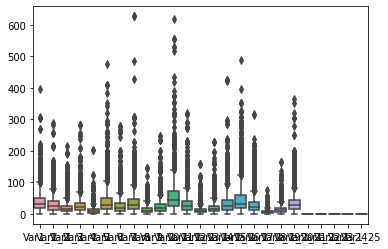

In [8]:
sns.boxplot(data=X_input)

<AxesSubplot:>

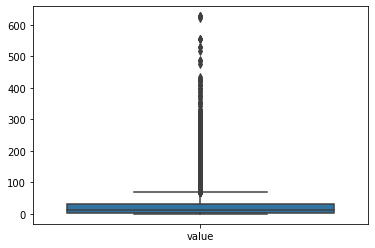

In [9]:
sns.boxplot(data=pd.melt(X_input))

### ***Removing Outliers***

In [10]:
max_threshold = X_input.quantile(0.95)
min_threshold = X_input.quantile(0.01)
X_input_removed_outliers = X_input[(X_input<max_threshold)&(X_input>min_threshold)]

### ***Results***

<AxesSubplot:>

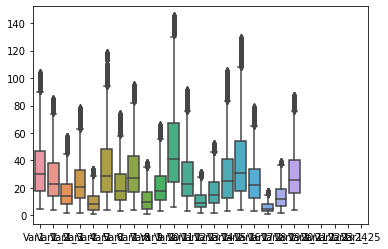

In [11]:
sns.boxplot(data=X_input_removed_outliers)

<AxesSubplot:>

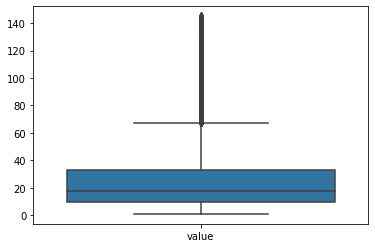

In [12]:
sns.boxplot(data=pd.melt(X_input_removed_outliers))

## ***Checking Co-relation***

AxesSubplot(0.125,0.125;0.62x0.755)


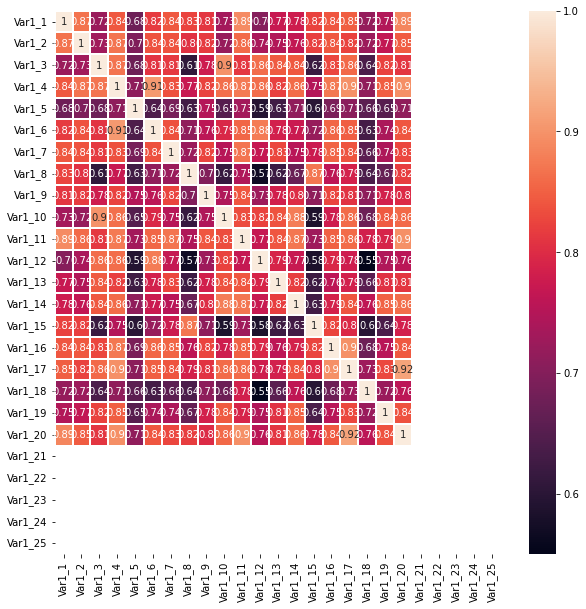

In [13]:
corr1=X_input.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10)) 
print(sns.heatmap(corr1, annot=True,linewidths=2,ax=ax))

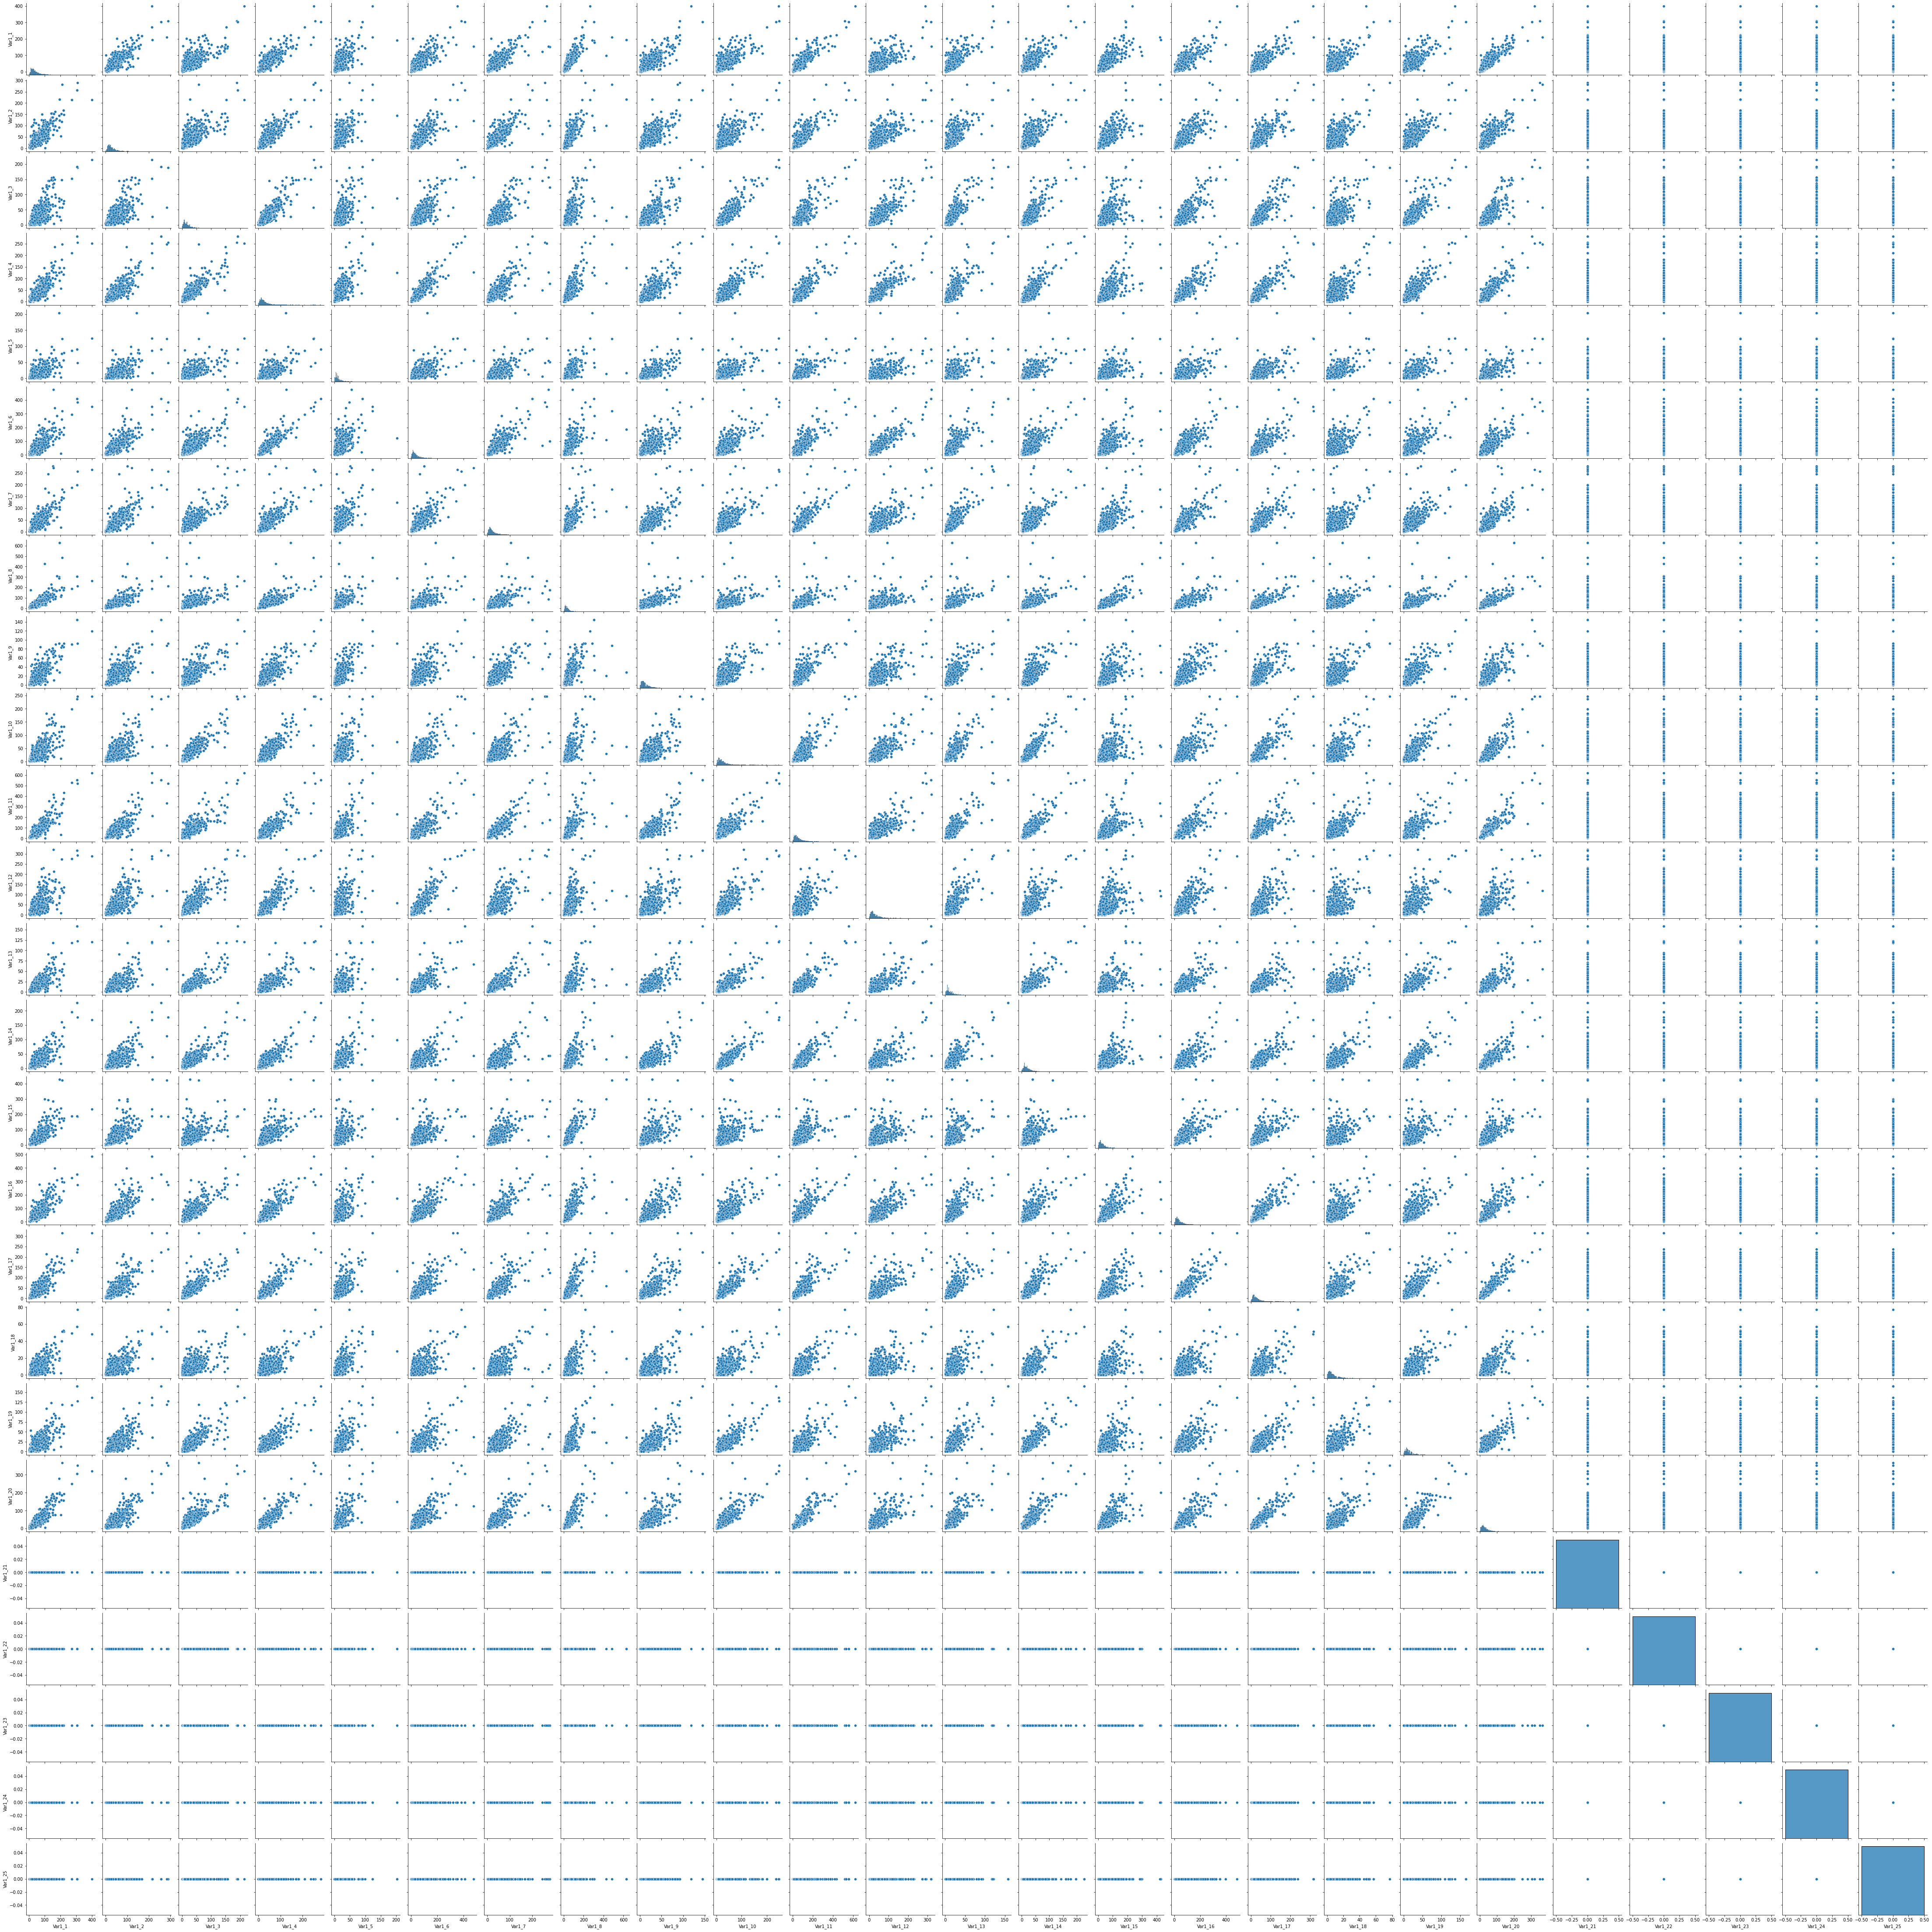

In [14]:
sns.pairplot(X_input)

## ***Now Checking Null values***

In [15]:
null_checking=X_input_removed_outliers.isnull().sum()
null_checking = null_checking.to_frame()

### ***Dropping Columns***

In [16]:
X_input_dropped = X_input_removed_outliers.drop(columns=['Var1_21','Var1_22','Var1_23','Var1_23','Var1_24','Var1_25'])

### ***Checking Mean values of each column***

In [17]:
mean=X_input_dropped.mean()
mean

Var1_1     35.329553
Var1_2     28.121279
Var1_3     17.310785
Var1_4     24.667506
Var1_5     10.159911
Var1_6     35.419181
Var1_7     22.791785
Var1_8     32.112200
Var1_9     12.189517
Var1_10    21.533057
Var1_11    48.948960
Var1_12    28.326252
Var1_13    11.027743
Var1_14    17.990554
Var1_15    30.770300
Var1_16    38.957400
Var1_17    25.418222
Var1_18     5.919209
Var1_19    13.772976
Var1_20    30.188465
dtype: float64

### ***Filling Null values of each column with its mean***

In [18]:
X_input_new=X_input_dropped.fillna(mean)

In [19]:
X_input_new.shape

(3382, 20)

### ***After filling Null values:***
#### - ***we will make sure there is no NaN values in dataset***

In [20]:
X_input_new.isnull().sum()

Var1_1     0
Var1_2     0
Var1_3     0
Var1_4     0
Var1_5     0
Var1_6     0
Var1_7     0
Var1_8     0
Var1_9     0
Var1_10    0
Var1_11    0
Var1_12    0
Var1_13    0
Var1_14    0
Var1_15    0
Var1_16    0
Var1_17    0
Var1_18    0
Var1_19    0
Var1_20    0
dtype: int64

## ***DATA AUGMENTATION***

### ***Merging dataset***
- Merging the input and output data

In [21]:
dataset_merge=pd.concat([X_input_new,Y_output], axis=1) 
dataset_merge.head(3)

,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_12,Var1_13,Var1_14,Var1_15,Var1_16,Var1_17,Var1_18,Var1_19,Var1_20,Label
0,6.0,6.0,10.0,7.0,5.0,14.0,11.0,12.0,12.189517,13.0,...,13.000000,5.0,11.0,5.0,9.0,9.0,4.0,6.0,15.0,1
1,21.0,14.0,12.0,10.0,1.0,21.0,10.0,18.0,4.000000,6.0,...,6.000000,6.0,13.0,7.0,23.0,11.0,7.0,6.0,18.0,1
2,17.0,20.0,6.0,9.0,4.0,11.0,12.0,12.0,5.000000,6.0,...,28.326252,8.0,8.0,24.0,21.0,6.0,2.0,6.0,5.0,1


In [22]:
data_aug=dataset_merge

## ***Splitting Positive DATA SAMPLE***

In [23]:
positive=data_aug.drop(data_aug[(data_aug.Label==0)].index)
#positive.drop('Label',inplace=True, axis=1)
positive.head(3)

,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_12,Var1_13,Var1_14,Var1_15,Var1_16,Var1_17,Var1_18,Var1_19,Var1_20,Label
0,6.0,6.0,10.0,7.0,5.0,14.0,11.0,12.0,12.189517,13.0,...,13.000000,5.0,11.0,5.0,9.0,9.0,4.0,6.0,15.0,1
1,21.0,14.0,12.0,10.0,1.0,21.0,10.0,18.0,4.000000,6.0,...,6.000000,6.0,13.0,7.0,23.0,11.0,7.0,6.0,18.0,1
2,17.0,20.0,6.0,9.0,4.0,11.0,12.0,12.0,5.000000,6.0,...,28.326252,8.0,8.0,24.0,21.0,6.0,2.0,6.0,5.0,1


### ***DATA AUGMENTATION ON POSITIVE DATA SAMPLES***
##### ***saving each column name with their standard deviation value***

In [24]:
var1p=positive.Var1_1
var2p=positive.Var1_2
var3p=positive.Var1_3
var4p=positive.Var1_4
var5p=positive.Var1_5
var6p=positive.Var1_6
var7p=positive.Var1_7
var8p=positive.Var1_8
var9p=positive.Var1_9
var10p=positive.Var1_10
var11p=positive.Var1_11
var12p=positive.Var1_12
var13p=positive.Var1_13
var14p=positive.Var1_14
var15p=positive.Var1_15
var16p=positive.Var1_16
var17p=positive.Var1_17
var18p=positive.Var1_18
var19p=positive.Var1_19
var20p=positive.Var1_20
labelp=1
##############
vars1p=np.std(var1p)
vars2p=np.std(var2p)
vars3p=np.std(var3p)
vars4p=np.std(var4p)
vars5p=np.std(var5p)
vars6p=np.std(var6p)
vars7p=np.std(var7p)
vars8p=np.std(var8p)
vars9p=np.std(var9p)
vars10p=np.std(var10p)
vars11p=np.std(var11p)
vars12p=np.std(var12p)
vars13p=np.std(var13p)
vars14p=np.std(var14p)
vars15p=np.std(var15p)
vars16p=np.std(var16p)
vars17p=np.std(var17p)
vars18p=np.std(var18p)
vars19p=np.std(var19p)
vars20p=np.std(var20p)

#### ***performing full data augmentation on POSITIVE samples***

In [25]:
dataset_positive=[]
for _,row in positive.iterrows():
        temp={
            'Var1_1':row['Var1_1'],
            'Var1_2':row['Var1_2'],
            'Var1_3':row['Var1_3'],
            'Var1_4':row['Var1_4'],
            'Var1_5':row['Var1_5'],
            'Var1_6':row['Var1_6'],
            'Var1_7':row['Var1_7'],
            'Var1_8':row['Var1_8'],
            'Var1_9':row['Var1_9'],
            'Var1_10':row['Var1_10'],
            'Var1_11':row['Var1_11'],
            'Var1_12':row['Var1_12'],
            'Var1_13':row['Var1_13'],
            'Var1_14':row['Var1_14'],
            'Var1_15':row['Var1_15'],
            'Var1_16':row['Var1_16'],
            'Var1_17':row['Var1_17'],
            'Var1_18':row['Var1_18'],
            'Var1_19':row['Var1_19'],
            'Var1_20':row['Var1_20'],
            'Label':1
        }
        dataset_positive.append(temp)

for _ in range(50):
    for _,row in positive.iterrows():
        temp={
            'Var1_1':row['Var1_1']+np.random.uniform(vars1p),
            'Var1_2':row['Var1_2']+np.random.uniform(vars2p),
            'Var1_3':row['Var1_3']+np.random.uniform(vars3p),
            'Var1_4':row['Var1_4']+np.random.uniform(vars4p),
            'Var1_5':row['Var1_5']+np.random.uniform(vars5p),
            'Var1_6':row['Var1_6']+np.random.uniform(vars6p),
            'Var1_7':row['Var1_7']+np.random.uniform(vars7p),
            'Var1_8':row['Var1_8']+np.random.uniform(vars8p),
            'Var1_9':row['Var1_9']+np.random.uniform(vars9p),
            'Var1_10':row['Var1_10']+np.random.uniform(vars10p),
            'Var1_11':row['Var1_11']+np.random.uniform(vars11p),
            'Var1_12':row['Var1_12']+np.random.uniform(vars12p),
            'Var1_13':row['Var1_13']+np.random.uniform(vars13p),
            'Var1_14':row['Var1_14']+np.random.uniform(vars14p),
            'Var1_15':row['Var1_15']+np.random.uniform(vars15p),
            'Var1_16':row['Var1_16']+np.random.uniform(vars16p),
            'Var1_17':row['Var1_17']+np.random.uniform(vars17p),
            'Var1_18':row['Var1_18']+np.random.uniform(vars18p),
            'Var1_19':row['Var1_19']+np.random.uniform(vars19p),
            'Var1_20':row['Var1_20']+np.random.uniform(vars20p),
            'Label':1
        }
        dataset_positive.append(temp)

print(f'Data size before Performing DataAugmentation:{len(positive)}\n \nData size after performing Data Augmentation:{len(dataset_positive)}')

Data size before Performing DataAugmentation:1127
 
Data size after performing Data Augmentation:57477


### ***making list into dataframe***

In [26]:
dataset_positive1=pd.DataFrame(dataset_positive)

## ***Splitting Negative DATA SAMPLE***

In [27]:
negative=df.drop(data_aug[(data_aug.Label==1)].index)
negative.drop('Label',inplace=True, axis=1)
negative.head(3)

,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_16,Var1_17,Var1_18,Var1_19,Var1_20,Var1_21,Var1_22,Var1_23,Var1_24,Var1_25
1127,43,36,30,27,13,61,32,49,30,30,...,75,54,12,22,48,0,0,0,0,0
1128,40,26,11,28,4,19,21,42,17,18,...,40,16,6,15,37,0,0,0,0,0
1129,61,28,13,25,2,35,20,23,13,24,...,48,23,8,21,47,0,0,0,0,0


### ***DATA AUGMENTATION ON NEGATIVE DATA SAMPLES***
##### ***saving each column name with their standard deviation value***

In [28]:
var1n=negative.Var1_1
var2n=negative.Var1_2
var3n=negative.Var1_3
var4n=negative.Var1_4
var5n=negative.Var1_5
var6n=negative.Var1_6
var7n=negative.Var1_7
var8n=negative.Var1_8
var9n=negative.Var1_9
var10n=negative.Var1_10
var11n=negative.Var1_11
var12n=negative.Var1_12
var13n=negative.Var1_13
var14n=negative.Var1_14
var15n=negative.Var1_15
var16n=negative.Var1_16
var17n=negative.Var1_17
var18n=negative.Var1_18
var19n=negative.Var1_19
var20n=negative.Var1_20
labeln=0
##############
vars1n=np.std(var1n)
vars2n=np.std(var2n)
vars3n=np.std(var3n)
vars4n=np.std(var4n)
vars5n=np.std(var5n)
vars6n=np.std(var6n)
vars7n=np.std(var7n)
vars8n=np.std(var8n)
vars9n=np.std(var9n)
vars10n=np.std(var10n)
vars11n=np.std(var11n)
vars12n=np.std(var12n)
vars13n=np.std(var13n)
vars14n=np.std(var14n)
vars15n=np.std(var15n)
vars16n=np.std(var16n)
vars17n=np.std(var17n)
vars18n=np.std(var18n)
vars19n=np.std(var19n)
vars20n=np.std(var20n)
labeln=0

#### ***performing full data augmentation on NEGATIVE samples***

In [29]:
dataset_negative=[]
for _,row in negative.iterrows():
        temp={
            'Var1_1':row['Var1_1'],
            'Var1_2':row['Var1_2'],
            'Var1_3':row['Var1_3'],
            'Var1_4':row['Var1_4'],
            'Var1_5':row['Var1_5'],
            'Var1_6':row['Var1_6'],
            'Var1_7':row['Var1_7'],
            'Var1_8':row['Var1_8'],
            'Var1_9':row['Var1_9'],
            'Var1_10':row['Var1_10'],
            'Var1_11':row['Var1_11'],
            'Var1_12':row['Var1_12'],
            'Var1_13':row['Var1_13'],
            'Var1_14':row['Var1_14'],
            'Var1_15':row['Var1_15'],
            'Var1_16':row['Var1_16'],
            'Var1_17':row['Var1_17'],
            'Var1_18':row['Var1_18'],
            'Var1_19':row['Var1_19'],
            'Var1_20':row['Var1_20'],
            'Label':0
        }
        dataset_negative.append(temp)

for _ in range(50):
    for _,row in negative.iterrows():
        temp={
            'Var1_1':row['Var1_1']+np.random.uniform(vars1n),
            'Var1_2':row['Var1_2']+np.random.uniform(vars2n),
            'Var1_3':row['Var1_3']+np.random.uniform(vars3n),
            'Var1_4':row['Var1_4']+np.random.uniform(vars4n),
            'Var1_5':row['Var1_5']+np.random.uniform(vars5n),
            'Var1_6':row['Var1_6']+np.random.uniform(vars6n),
            'Var1_7':row['Var1_7']+np.random.uniform(vars7n),
            'Var1_8':row['Var1_8']+np.random.uniform(vars8n),
            'Var1_9':row['Var1_9']+np.random.uniform(vars9n),
            'Var1_10':row['Var1_10']+np.random.uniform(vars10n),
            'Var1_11':row['Var1_11']+np.random.uniform(vars11n),
            'Var1_12':row['Var1_12']+np.random.uniform(vars12n),
            'Var1_13':row['Var1_13']+np.random.uniform(vars13n),
            'Var1_14':row['Var1_14']+np.random.uniform(vars14n),
            'Var1_15':row['Var1_15']+np.random.uniform(vars15n),
            'Var1_16':row['Var1_16']+np.random.uniform(vars16n),
            'Var1_17':row['Var1_17']+np.random.uniform(vars17n),
            'Var1_18':row['Var1_18']+np.random.uniform(vars18n),
            'Var1_19':row['Var1_19']+np.random.uniform(vars19n),
            'Var1_20':row['Var1_20']+np.random.uniform(vars20n),
            'Label':0
        }
        dataset_negative.append(temp)


print(f'Data size before Performing DataAugmentation:{len(negative)}\n \nData size after performing Data Augmentation:{len(dataset_negative)}')

Data size before Performing DataAugmentation:2255
 
Data size after performing Data Augmentation:115005


### ***making list into dataframe***

In [30]:
dataset_negative1=pd.DataFrame(dataset_negative)

## ***MERGING POSITIVE AND NEGATIVE DATA SAMPLES INTO ONE DATASETS***

In [31]:
dataset_full=dataset_positive1.append(dataset_negative1)


C:\Users\CU-43\AppData\Local\Temp\ipykernel_13740\2262479005.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_full=dataset_positive1.append(dataset_negative1)


## ***SPLITTING FINAL DATASET INTO INPUT (X) AND OUTPUT (Y)***

In [32]:
X_final=dataset_full.iloc[:,0:20]
Y_final=dataset_full.iloc[:,-1]

## <center>***Passing Data to Machine Learning Algorithms***</center>

### ***Implementing Decision Tree Classifier***

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.25)
dt_model = DecisionTreeClassifier(random_state=20).fit(X_train,Y_train)
Y_predicted = dt_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
import pickle
pickle.dump(dt_model,open('dt_model.pkl','wb'))

the accuracy score is:0.8134783516152223
the f1-score is:0.7238834151532837
the recall-score is:0.7361402038821394
the confusion_matrix is:[[24535  4264]
 [ 3779 10543]]
Specificity is: 0.8519393034480364
Precision is: 0.7120280948200176


### ***ROC_Curve for Decision Tree***

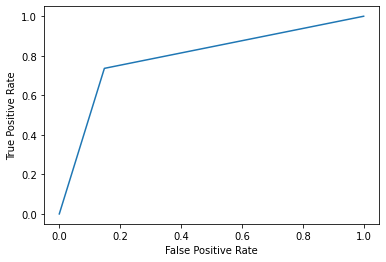

In [34]:
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Random Forest Classifier***

In [35]:
rf_model = RandomForestClassifier(n_estimators=50).fit(X_train,Y_train)
Y_predicted = rf_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
pickle.dump(rf_model,open('rf_model.pkl','wb'))

the accuracy score is:0.9202476751466803
the f1-score is:0.8711840281679589
the recall-score is:0.8119676022901829
the confusion_matrix is:[[28053   746]
 [ 2693 11629]]
Specificity is: 0.9740963227889857
Precision is: 0.9397171717171717


### ***ROC_Curve for Random Forest***

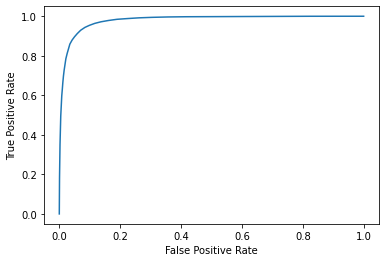

In [36]:
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Logistic Regression***

In [37]:
#X_train,X_test,Y_train,Y_test = train_test_split(X_input,Y_output,test_size=0.2)
lr_model = LogisticRegression(C=10,penalty='l2',tol=0.1).fit(X_train,Y_train)
Y_predicted = lr_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
pickle.dump(lr_model,open('lr_model.pkl','wb'))


the accuracy score is:0.6817327984044896
the f1-score is:0.33177524588567536
the recall-score is:0.23788577014383466
the confusion_matrix is:[[25990  2809]
 [10915  3407]]
Specificity is: 0.9024618910378832
Precision is: 0.5481016731016731


c:\Users\CU-43\anaconda3\envs\ml_fyp\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ***ROC_Curve for Logistic Reggrestion***

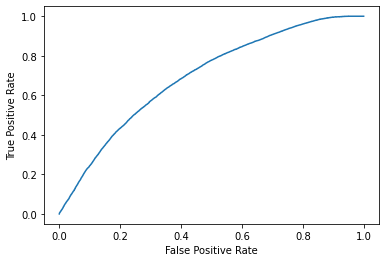

In [38]:
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Support Vector Classifier***

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_new,Y_output,test_size=0.2)
svc_model = SVC(kernel='rbf',  C=1000,gamma=1000000,probability=True).fit(X_train,Y_train)
Y_predicted = svc_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
pickle.dump(svc_model,open('svc_model.pkl','wb'))

the accuracy score is:0.8921713441654358
the f1-score is:0.8531187122736418
the recall-score is:0.9217391304347826
the confusion_matrix is:[[392  55]
 [ 18 212]]
Specificity is: 0.8769574944071589
Precision is: 0.7940074906367042


### ***ROC_Curve for SVC***

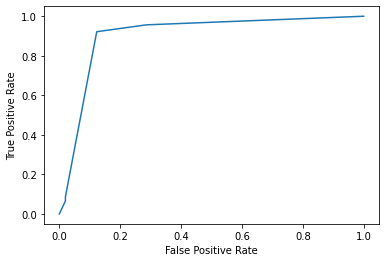

In [40]:
y_pred_proba = svc_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing K Neighbour Classifier***

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.25)
knn_model = KNeighborsClassifier(n_neighbors=1,weights="uniform").fit(X_train,Y_train)
Y_predicted = knn_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
pickle.dump(knn_model,open('knn_model.pkl','wb'))

the accuracy score is:0.8673036339602513
the f1-score is:0.8310699102503543
the recall-score is:0.9740484429065744
the confusion_matrix is:[[23324  5347]
 [  375 14075]]
Specificity is: 0.8135049353004778
Precision is: 0.7246936463803934


### ***ROC_Curve for KNN***

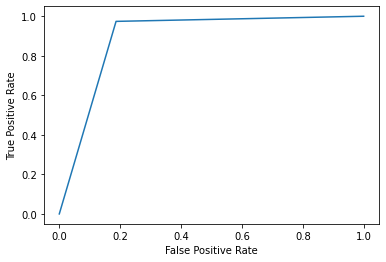

In [42]:
y_pred_proba = knn_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing XG Boost***

In [43]:
#X_train,X_test,Y_train,Y_test = train_test_split(X_input,Y_output,test_size=0.2)
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.25)
xgb_model = XGBClassifier(learning_rate=0.35, n_estimators=1000).fit(X_train,Y_train)
Y_predicted = xgb_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
#using pickle to save the model
pickle.dump(xgb_model,open('xtreme_model.pkl','wb'))



the accuracy score is:0.945316667053176
the f1-score is:0.9186728288611437
the recall-score is:0.9224908221929764
the confusion_matrix is:[[27445  1239]
 [ 1119 13318]]
Specificity is: 0.9568051875610096
Precision is: 0.9148863089922374


### ***ROC_Curve for XG Bosst***

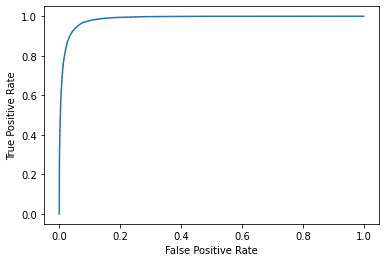

In [44]:
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Prediciton Result ##

In [45]:
Result1=model.predict([[-0.00674072, -0.02127364, -0.00558614,  0.03210725,  0.00322757,
        -0.00033976,  0.01292559,  0.00594468,  0.00802925,  0.00231626,
         0.00514112,  0.00173679,  0.00083799, -0.00757402, -0.00727668,
        -0.00277131, -0.00550406, -0.00010429, -0.00523747, -0.00920763,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
if Result1 == [[0]]:
        print ('No CML cancer Detected')
else:
        print('CML cancer Detected') 

NameError: name 'model' is not defined

In [ ]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)


In [ ]:
with open('model_pickle','rb') as f:
    Result2=pickle.load(f)

In [ ]:
Result2.predict([[-0.00674072, -0.02127364, -0.00558614,  0.03210725,  0.00322757,
        -0.00033976,  0.01292559,  0.00594468,  0.00802925,  0.00231626,
         0.00514112,  0.00173679,  0.00083799, -0.00757402, -0.00727668,
        -0.00277131, -0.00550406, -0.00010429, -0.00523747, -0.00920763,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
if Result2 == [[0]]:
        print ('No CML cancer Detected')
else:
        print('CML cancer Detected')

CML cancer Detected


c:\Users\CU-43\anaconda3\envs\ml_fyp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


******